# Import Data

In [20]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# so values can be viewed as scrollable element
np.set_printoptions(threshold=sys.maxsize)


In [21]:
data_filepath = ".\\modified_data\\cleaned_data.csv"
data = pd.read_csv(data_filepath)

# Generate Heatmap

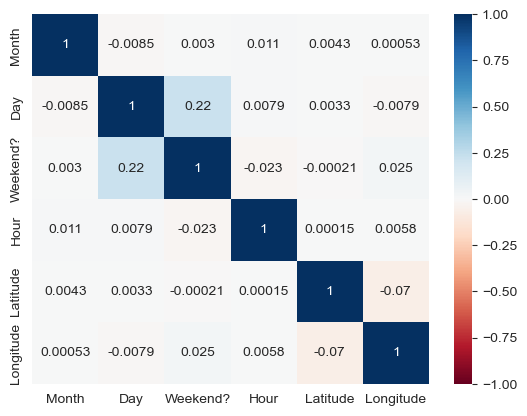

In [22]:
# attempt to find relationships between data
data_with_weekend = pd.read_csv('.\\modified_data\\cleaned_injury_data.csv')
data_with_weekend = data_with_weekend.drop(columns=['Collision Type', 'Injury Type', 'Primary Factor'])
correlation_matrix = data_with_weekend.corr()
pcmp = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Generate PairPlots

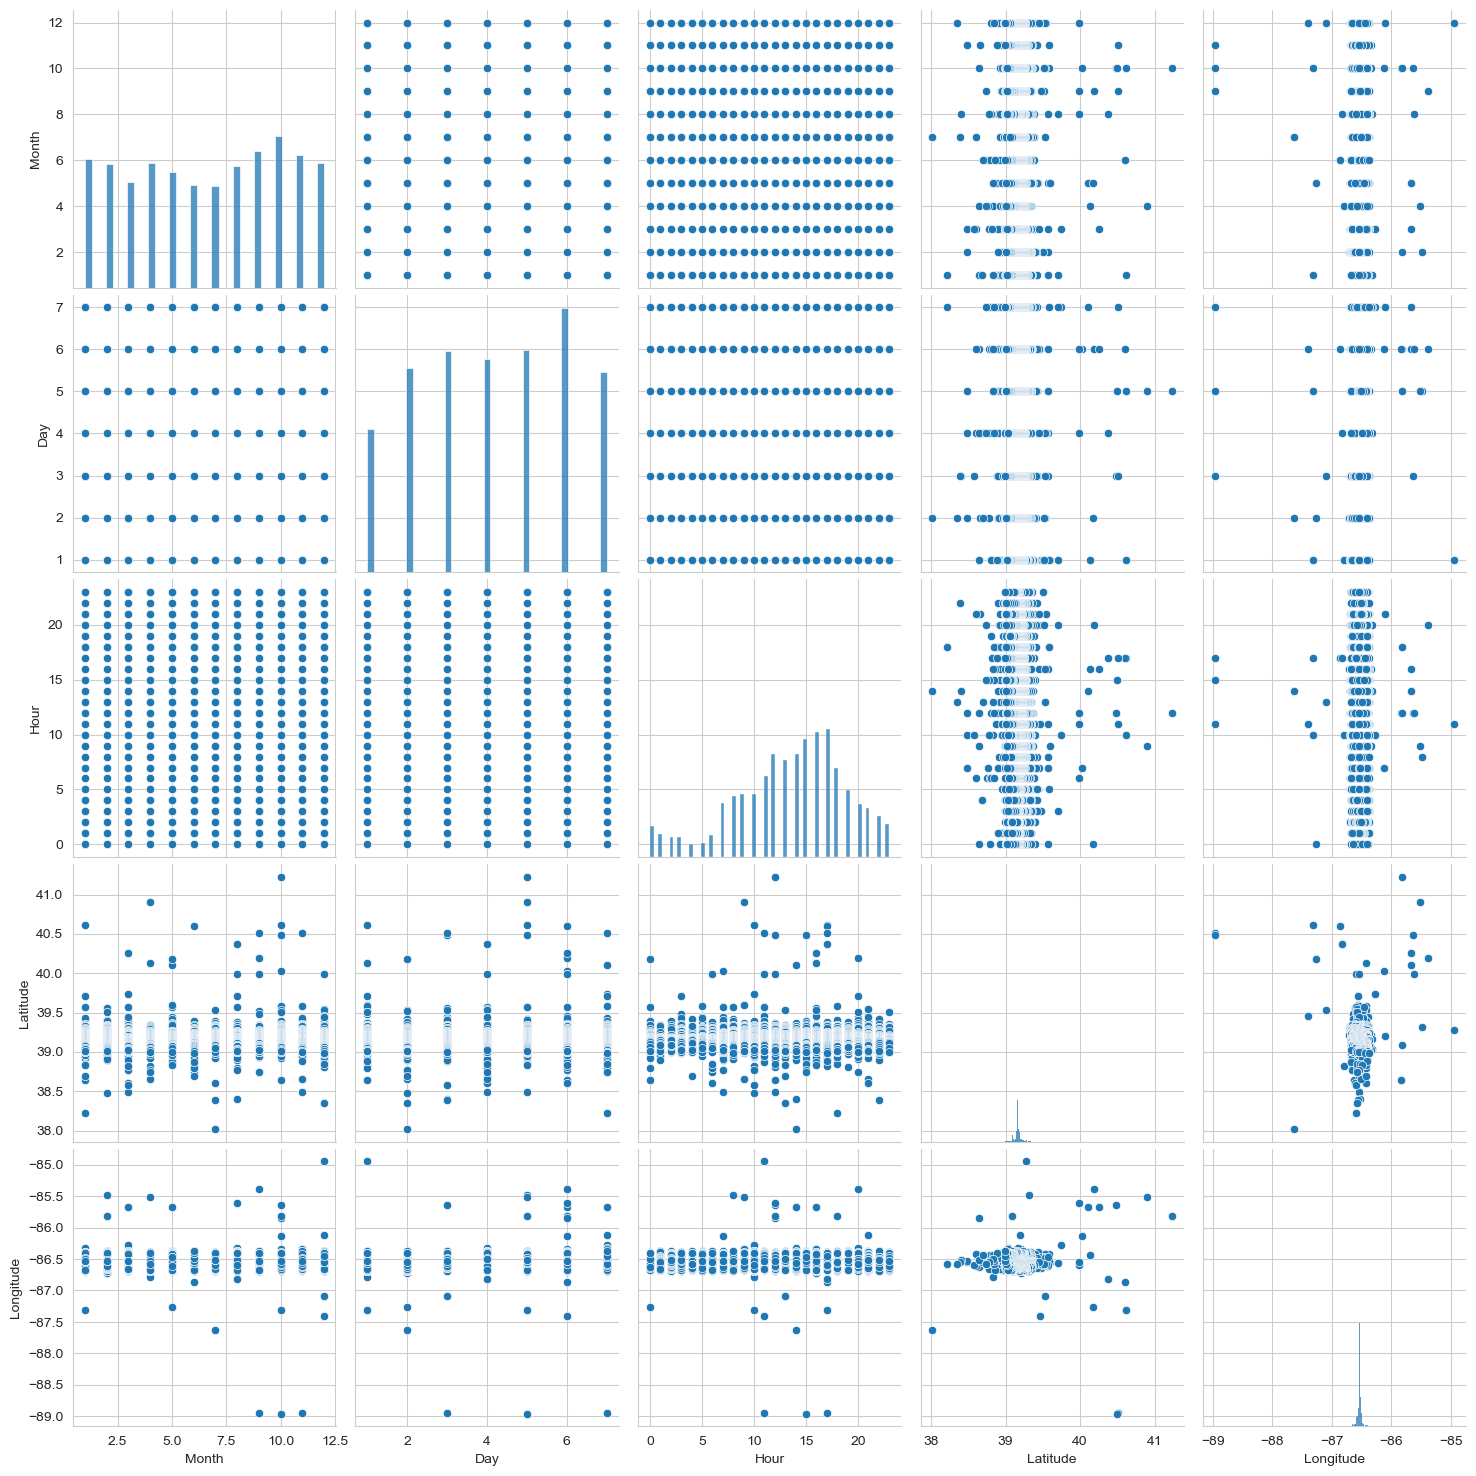

In [23]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, height=3);
plt.show()

# Make Histograms for Every Feature to Determine If There're Any Obvious Patterns

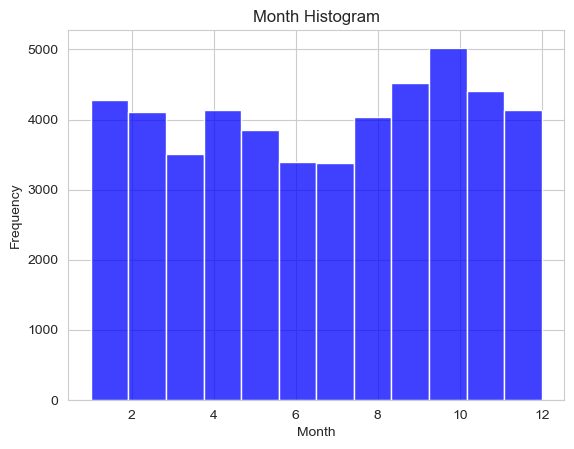

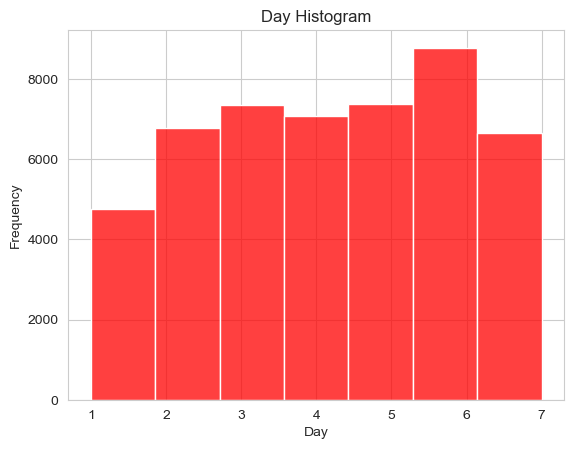

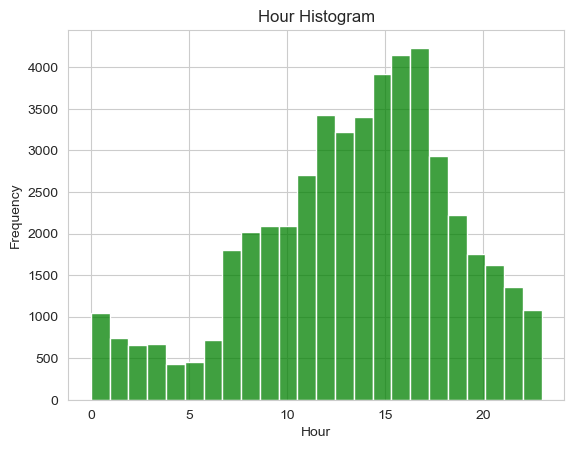

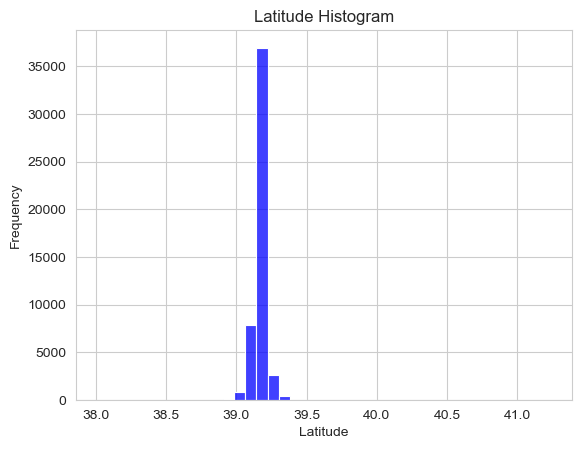

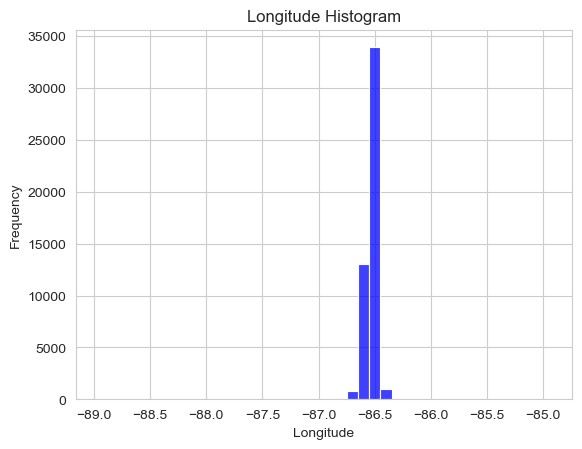

In [24]:
# Feature 1 : Month
sns.histplot(data['Month'], bins=12, kde=False, color='blue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Month Histogram')
plt.show()

# Feature 2 : Day
sns.histplot(data['Day'], bins=7, kde=False, color='red')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Day Histogram')
plt.show()

# Feature 3 : Hour
sns.histplot(data['Hour'], bins=24, kde=False, color='Green')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hour Histogram')
plt.show()

# Feature 4 : Latitude
sns.histplot(data['Latitude'], bins=40, kde=False, color='blue', binrange=(38.01932812, 41.22866547))
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Latitude Histogram')
plt.show()

# Feature 5 : Longitude
sns.histplot(data['Longitude'], bins=40, kde=False, color='blue', binrange=(-88.959213, -84.94479))
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude Histogram')
plt.show()

# Conclusions

It's evident that our data is too complicated to be modeled by a simple classifier such as linear or logistic. We can attempt to use simpler classifiers (naive bayes and decision trees) and check performance. If those do not perform well, we can attempt to increase complexity using more complicated models (neural networks, random forest). These more complex models are more prone to overfitting so we'll need to be sure we use a strategy such as k-fold validation to ensure good generalization.

# EDA Journey:
**Initial Drops**

We can drop "Collision Type, Injury Type, Primary Factor" because this is information one wouldn't know until the accident has already happened.

**HeatMap Interpretation**

The only notable linearity we have is between "Weekend?" and "Day" with a correlation index of .22; this isn't a super strong correlation but we intuitively know that day of the week will account for whether it is or isn't the weekend so we can safely drop this feature.

**PairPlot/Histogram Interpretation**

Since the value we're trying to predict isn't a feature of the dataset the main part of the pariplot we'll be observing are the histograms. We generated histograms separately using sns as well so that we could use those clearer pictures as figures in our report. From the above histograms we can observe that there is indication that our selected features have an influence on whether there is a crash or not. For months, it's evident that the earlier and latter parts of the year have more accidents than the middle. For days, it's evident that there's slight variation between all days but particularly more accidents on Saturdays and fewer on Mondays. For hours, 11:00 to 18:00 have notably more accidents than other times. Longitude and latitude also have varying counts depending on value with a very high count for some buckets and very low for others; this could be due to fewer samples closer to county lines than inside the city but we will forego any sort of assumptions about the collection of this data. Since there're noticeable patterns in all features above, we hope that cummulatively they can be used to classify a set of trip details as having an accident or not.



# Process of determining a model to use

We have an unlabeled dataset and did not consider that this would require unsupervised learning when we first started this project. Since we hadn't learned unsupervised learning yet, we attempted to "hack" a solution to generate labels we could model for

**Approach 1**

Our original plan was to use regresssion to generate a probability that any given "travel data observation" would result in a crash. Since we didn't have a "crash probability" as part of our dataset, we attempted to create one by generating the probability of a crash for each label (for example, to determine the probability of crashing on a Tuesday we'd find $\frac{\text{Number of Crashes on Tuesdays}}{\text{Total Number of Crashes}}$) then multiplying these probabilities for each feature. The first issue was that this resulted in very small values, so we used the log function to make the bigger and then min max scaling to try to even it out a bit more (which was okay since we only cared about relative probabilities for this project). We then attempted to use these values to train our models (tried using decision trees, SVMs, and neural networks). We attempted the aforementioned ML models because we knew our data was non-linear and needed something that could train for more complex datasets. We were ultimately able to successfully create models that were very accurate! The only issue was that they were suspiciously accurate, reaching an R2 score of 1.00 for testing and .99 for testing. This held up with even a validation set so we had to consider how the way we calculated total probability could have made it so easy to predict. We came to the realization that our method of computing the total probability essentially determined how likely it is for a data point to be in the seen-data. We want our model to not only reflect historical data but also replicate underlying models so that we can use it to predict future events. We then knew we had to find a different way to determine if a given drive would be likely to have an accident or not.

**Approach 2: Crash Classifier**

We recognized that the data we had solely consisted of crash instances